<a href="https://colab.research.google.com/github/Barathkumar01/Data-Science-Projects/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Chennai House Price Prediction**

Problem Statement Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

Data The historical sale data is available here.

**Minimum Requirements** 

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.



In [ ]:
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score



In [ ]:
df=pd.read_csv('Chennai housing sale.csv')

In [ ]:
df.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df.shape

(7109, 22)

In [ ]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7056 non-null   object 
 1   AREA           7056 non-null   object 
 2   INT_SQFT       7056 non-null   int64  
 3   DATE_SALE      7056 non-null   object 
 4   DIST_MAINROAD  7056 non-null   int64  
 5   N_BEDROOM      7056 non-null   float64
 6   N_BATHROOM     7056 non-null   float64
 7   N_ROOM         7056 non-null   int64  
 8   SALE_COND      7056 non-null   object 
 9   PARK_FACIL     7056 non-null   object 
 10  DATE_BUILD     7056 non-null   object 
 11  BUILDTYPE      7056 non-null   object 
 12  UTILITY_AVAIL  7056 non-null   object 
 13  STREET         7056 non-null   object 
 14  MZZONE         7056 non-null   object 
 15  QS_ROOMS       7056 non-null   float64
 16  QS_BATHROOM    7056 non-null   float64
 17  QS_BEDROOM     7056 non-null   float64
 18  QS_OVERA

In [ ]:
df['TOTAL_PRICE']=df['REG_FEE']+df['COMMIS']+df['SALES_PRICE']

**Area column**

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.area.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
df.area=df.area.str.lower()

In [ ]:
df.area = df.area.replace({'ana nagar':'anna nagar',
                           'ana nagar':'anna nagar',
                           'ann nagar':'anna nagar',
                           'karapakam':'karapakkam',
                           'adyr':'adyar',
                           'velchery':'velachery', 'kknagar':'kk nagar', 'tnagar':'t nagar', 'chormpet':'chrompet','chrompt':'chrompet', 'chrmpet':'chrompet'})


In [ ]:
df.area.unique()


array(['karapakkam', 'anna nagar', 'adyar', 'velachery', 'chrompet',
       'kk nagar', 't nagar'], dtype=object)

In [ ]:
len(df.area.unique())

7

In [ ]:
df.area.value_counts()

chrompet      1691
karapakkam    1359
kk nagar       990
velachery      975
anna nagar     777
adyar          769
t nagar        495
Name: area, dtype: int64

**Sale condition**

In [ ]:
df.sale_cond.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
df.sale_cond = df.sale_cond.str.lower()

In [ ]:
df.sale_cond = df.sale_cond.replace({'ab normal':'abnormal',
                                         'partiall':'partial',
                                         'adj land':'adjland', 
                                         'normal sale':'normal sale'})

In [ ]:
df.sale_cond.unique()

array(['abnormal', 'family', 'partial', 'adjland', 'normal sale'],
      dtype=object)

**N_BATHROOM**

In [ ]:
df.n_bathroom.isnull().sum()

0

In [ ]:
df.n_bathroom.dtype

dtype('float64')

In [ ]:
df["n_bathroom"]=df["n_bathroom"].astype("int")

In [ ]:
df.n_bathroom.dtype

dtype('int64')

**N_BEDROOM**

In [ ]:
df.n_bedroom.isnull().sum()

0

In [ ]:
df["n_bedroom"]=df["n_bedroom"].astype("int")

In [ ]:
df.n_bedroom.dtype

dtype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prt_id         7056 non-null   object 
 1   area           7056 non-null   object 
 2   int_sqft       7056 non-null   int64  
 3   date_sale      7056 non-null   object 
 4   dist_mainroad  7056 non-null   int64  
 5   n_bedroom      7056 non-null   int64  
 6   n_bathroom     7056 non-null   int64  
 7   n_room         7056 non-null   int64  
 8   sale_cond      7056 non-null   object 
 9   park_facil     7056 non-null   object 
 10  date_build     7056 non-null   object 
 11  buildtype      7056 non-null   object 
 12  utility_avail  7056 non-null   object 
 13  street         7056 non-null   object 
 14  mzzone         7056 non-null   object 
 15  qs_rooms       7056 non-null   float64
 16  qs_bathroom    7056 non-null   float64
 17  qs_bedroom     7056 non-null   float64
 18  qs_overa

In [ ]:
df.head(5)

,prt_id,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,...,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price,total_price
0,P03210,karapakkam,1004,04-05-2011,131,1,1,3,abnormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,8124400
1,P09411,anna nagar,1986,19-12-2006,26,2,1,5,abnormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,22781941
2,P01812,adyar,909,04-02-2012,70,1,1,3,abnormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,13672408
3,P05346,velachery,1855,13-03-2010,14,3,2,5,family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,10063653
4,P06210,karapakkam,1226,05-10-2009,84,1,1,3,abnormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,7717313


**qs_rooms**

In [ ]:
df.qs_rooms.isnull().sum()

0

In [ ]:
df.qs_rooms.dtype

dtype('float64')

In [ ]:
df["qs_rooms"]=df["qs_rooms"].astype("int")

In [ ]:
df.qs_rooms.dtype

dtype('int64')

**qs_bathroom,qs_bedroom,qs_overall**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prt_id         7056 non-null   object 
 1   area           7056 non-null   object 
 2   int_sqft       7056 non-null   int64  
 3   date_sale      7056 non-null   object 
 4   dist_mainroad  7056 non-null   int64  
 5   n_bedroom      7056 non-null   int64  
 6   n_bathroom     7056 non-null   int64  
 7   n_room         7056 non-null   int64  
 8   sale_cond      7056 non-null   object 
 9   park_facil     7056 non-null   object 
 10  date_build     7056 non-null   object 
 11  buildtype      7056 non-null   object 
 12  utility_avail  7056 non-null   object 
 13  street         7056 non-null   object 
 14  mzzone         7056 non-null   object 
 15  qs_rooms       7056 non-null   int64  
 16  qs_bathroom    7056 non-null   float64
 17  qs_bedroom     7056 non-null   float64
 18  qs_overa

In [ ]:
df["qs_bathroom"]=df["qs_bathroom"].astype("int")
df["qs_bedroom"]=df["qs_bedroom"].astype("int")
df["qs_overall"]=df["qs_overall"].astype("int")

In [ ]:
df.qs_bathroom.dtype

dtype('int64')

In [ ]:
df.qs_bedroom.dtype

dtype('int64')

In [ ]:
df.qs_overall.dtype

dtype('int64')

In [ ]:
df.head() 

,prt_id,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,...,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price,total_price
0,P03210,karapakkam,1004,04-05-2011,131,1,1,3,abnormal,Yes,...,Paved,A,4,3,4,4,380000,144400,7600000,8124400
1,P09411,anna nagar,1986,19-12-2006,26,2,1,5,abnormal,No,...,Gravel,RH,4,4,2,3,760122,304049,21717770,22781941
2,P01812,adyar,909,04-02-2012,70,1,1,3,abnormal,Yes,...,Gravel,RL,4,3,2,3,421094,92114,13159200,13672408
3,P05346,velachery,1855,13-03-2010,14,3,2,5,family,No,...,Paved,I,4,3,3,4,356321,77042,9630290,10063653
4,P06210,karapakkam,1226,05-10-2009,84,1,1,3,abnormal,Yes,...,Gravel,C,3,2,4,3,237000,74063,7406250,7717313


**date_sale & date_build**

In [ ]:
df.date_sale.dtype

dtype('O')

In [ ]:
df.date_build.dtype

dtype('O')

In [ ]:
df.date_sale = pd.to_datetime(df.date_sale, format='%d-%m-%Y')
df.date_build = pd.to_datetime(df.date_build, format='%d-%m-%Y')


In [ ]:
df.date_sale.dtype

dtype('<M8[ns]')

In [ ]:
df["date_build"][45]

Timestamp('1982-09-18 00:00:00')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   prt_id         7056 non-null   object        
 1   area           7056 non-null   object        
 2   int_sqft       7056 non-null   int64         
 3   date_sale      7056 non-null   datetime64[ns]
 4   dist_mainroad  7056 non-null   int64         
 5   n_bedroom      7056 non-null   int64         
 6   n_bathroom     7056 non-null   int64         
 7   n_room         7056 non-null   int64         
 8   sale_cond      7056 non-null   object        
 9   park_facil     7056 non-null   object        
 10  date_build     7056 non-null   datetime64[ns]
 11  buildtype      7056 non-null   object        
 12  utility_avail  7056 non-null   object        
 13  street         7056 non-null   object        
 14  mzzone         7056 non-null   object        
 15  qs_rooms       7056 n

In [ ]:
df['building_age']=pd.DatetimeIndex(df.date_sale).year - pd.DatetimeIndex(df.date_build).year

In [ ]:
print(df['building_age'])

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: building_age, Length: 7056, dtype: int64


Has we have obtained the building date from date_sale and date_build, so we there is no need of dat_sale and date_build column

In [ ]:
df=df.drop(["date_sale", "date_build"], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   prt_id         7056 non-null   object
 1   area           7056 non-null   object
 2   int_sqft       7056 non-null   int64 
 3   dist_mainroad  7056 non-null   int64 
 4   n_bedroom      7056 non-null   int64 
 5   n_bathroom     7056 non-null   int64 
 6   n_room         7056 non-null   int64 
 7   sale_cond      7056 non-null   object
 8   park_facil     7056 non-null   object
 9   buildtype      7056 non-null   object
 10  utility_avail  7056 non-null   object
 11  street         7056 non-null   object
 12  mzzone         7056 non-null   object
 13  qs_rooms       7056 non-null   int64 
 14  qs_bathroom    7056 non-null   int64 
 15  qs_bedroom     7056 non-null   int64 
 16  qs_overall     7056 non-null   int64 
 17  reg_fee        7056 non-null   int64 
 18  commis         7056 non-null

**Street**

In [ ]:
df.street.isnull().sum()

0

In [ ]:
df.street.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
df.street = df.street.replace({'Pavd':'Paved','NoAccess':'No Access'})

In [ ]:
df.street.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

**Utility_availability**

In [ ]:
df.utility_avail.isnull().sum()

0

In [ ]:
df.utility_avail.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
df.utility_avail=df.utility_avail.replace({'AllPub':'All Pub','NoSewr ':'NoSewr'})

In [ ]:
df.utility_avail.unique()

array(['All Pub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [ ]:
df.utility_avail.isnull().sum()

0

**Park_facil, Mzzone**

In [ ]:
df.park_facil.dtype

dtype('O')

In [ ]:
df.park_facil.isnull().sum()

0

In [ ]:
df.park_facil.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
df.park_facil=df.park_facil.replace({'Noo':'No'})

In [ ]:
df.park_facil.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df.mzzone.dtype

dtype('O')

In [ ]:
df.mzzone.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

**Build_type**

In [ ]:
df.buildtype.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
df.buildtype=df.buildtype.replace({'Other':'Others','Comercial':'Commercial'})

In [ ]:
df.buildtype.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
df.buildtype.isnull().sum()

0

In [ ]:
import seaborn as sns

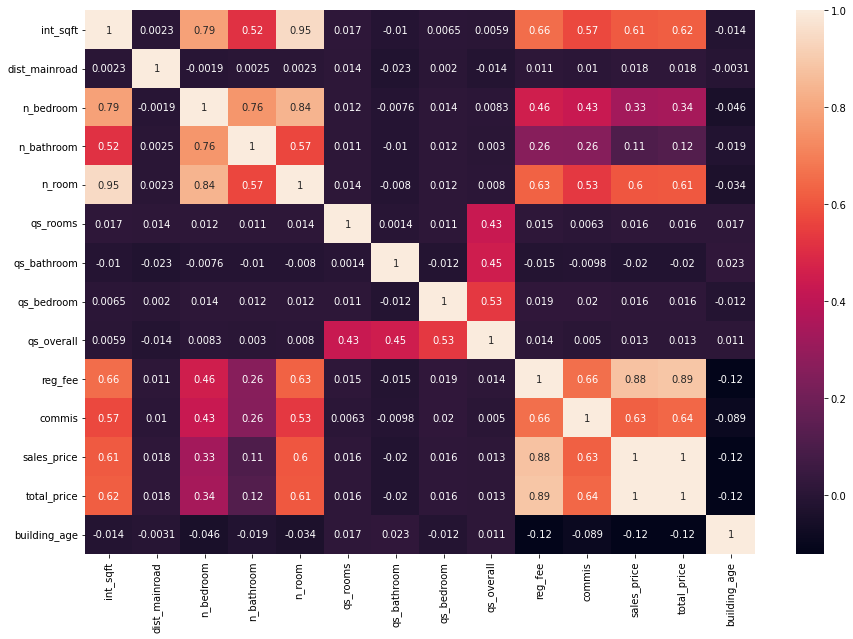

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'), annot=True)
plt.show()

commision and registration fee columns these two columns don't directly contribute to determine the sale we can add value of these two column on sales column and try to predict total sale price.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


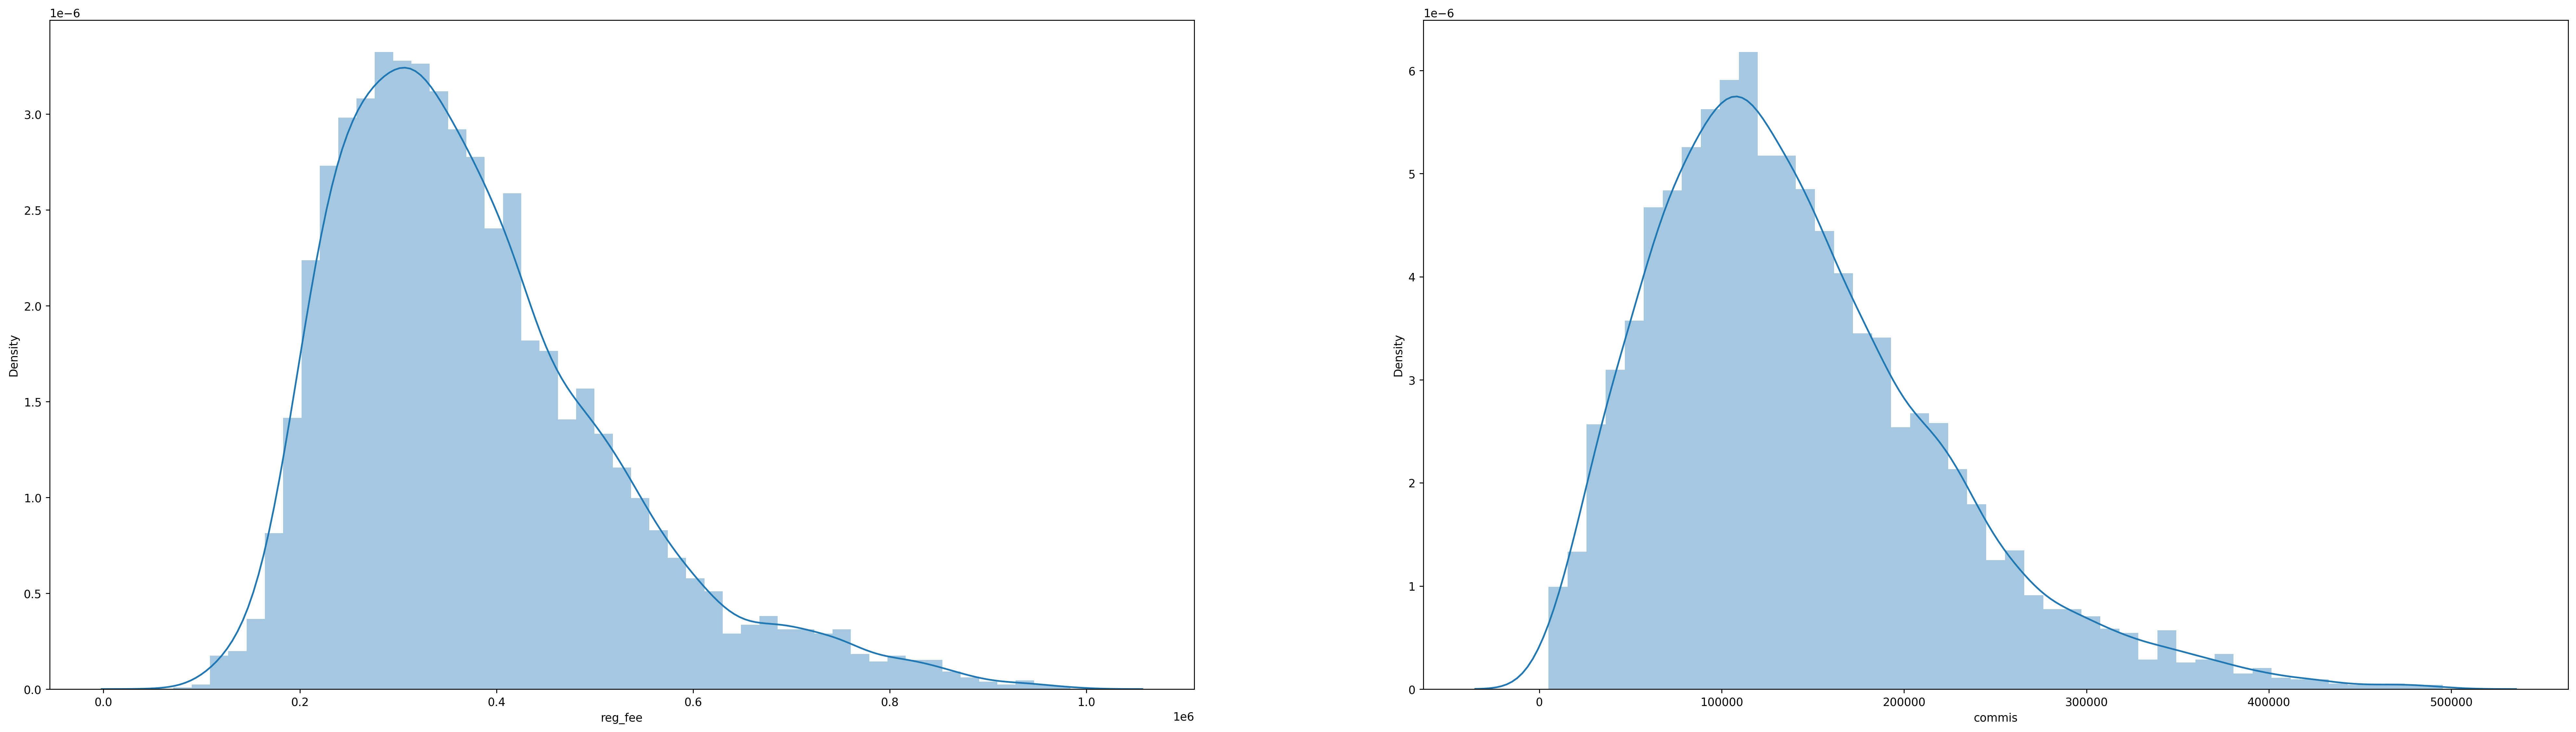

In [ ]:
plt.figure(figsize=(40, 24), dpi=250)



plt.subplot(221)
sns.distplot(df.reg_fee)

plt.subplot(222)
sns.distplot(df.commis)

plt.show()

In [ ]:
df= df.drop(["reg_fee", "commis"], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   prt_id         7056 non-null   object
 1   area           7056 non-null   object
 2   int_sqft       7056 non-null   int64 
 3   dist_mainroad  7056 non-null   int64 
 4   n_bedroom      7056 non-null   int64 
 5   n_bathroom     7056 non-null   int64 
 6   n_room         7056 non-null   int64 
 7   sale_cond      7056 non-null   object
 8   park_facil     7056 non-null   object
 9   buildtype      7056 non-null   object
 10  utility_avail  7056 non-null   object
 11  street         7056 non-null   object
 12  mzzone         7056 non-null   object
 13  qs_rooms       7056 non-null   int64 
 14  qs_bathroom    7056 non-null   int64 
 15  qs_bedroom     7056 non-null   int64 
 16  qs_overall     7056 non-null   int64 
 17  sales_price    7056 non-null   int64 
 18  total_price    7056 non-null

In [ ]:
df.describe()

,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,total_price,building_age
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03,7.056000e+03,7056.000000
mean,1381.316752,99.569161,1.636621,1.213152,3.686650,3.075680,3.068452,3.055981,3.004535,1.088801e+07,1.140579e+07,24.273526
std,457.860850,57.403870,0.803633,0.409563,1.020011,0.873225,0.875684,0.871543,0.605416,3.769081e+06,3.945567e+06,12.331565
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,2.253935e+06,3.000000
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,8.266790e+06,8.639780e+06,14.000000
50%,1369.500000,99.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,3.000000,1.031922e+07,1.080447e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.298148e+07,1.360245e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.000000,2.366734e+07,2.496904e+07,55.000000


**CHECK FOR OUTLIERS**

*totally 4 continous variable data.*

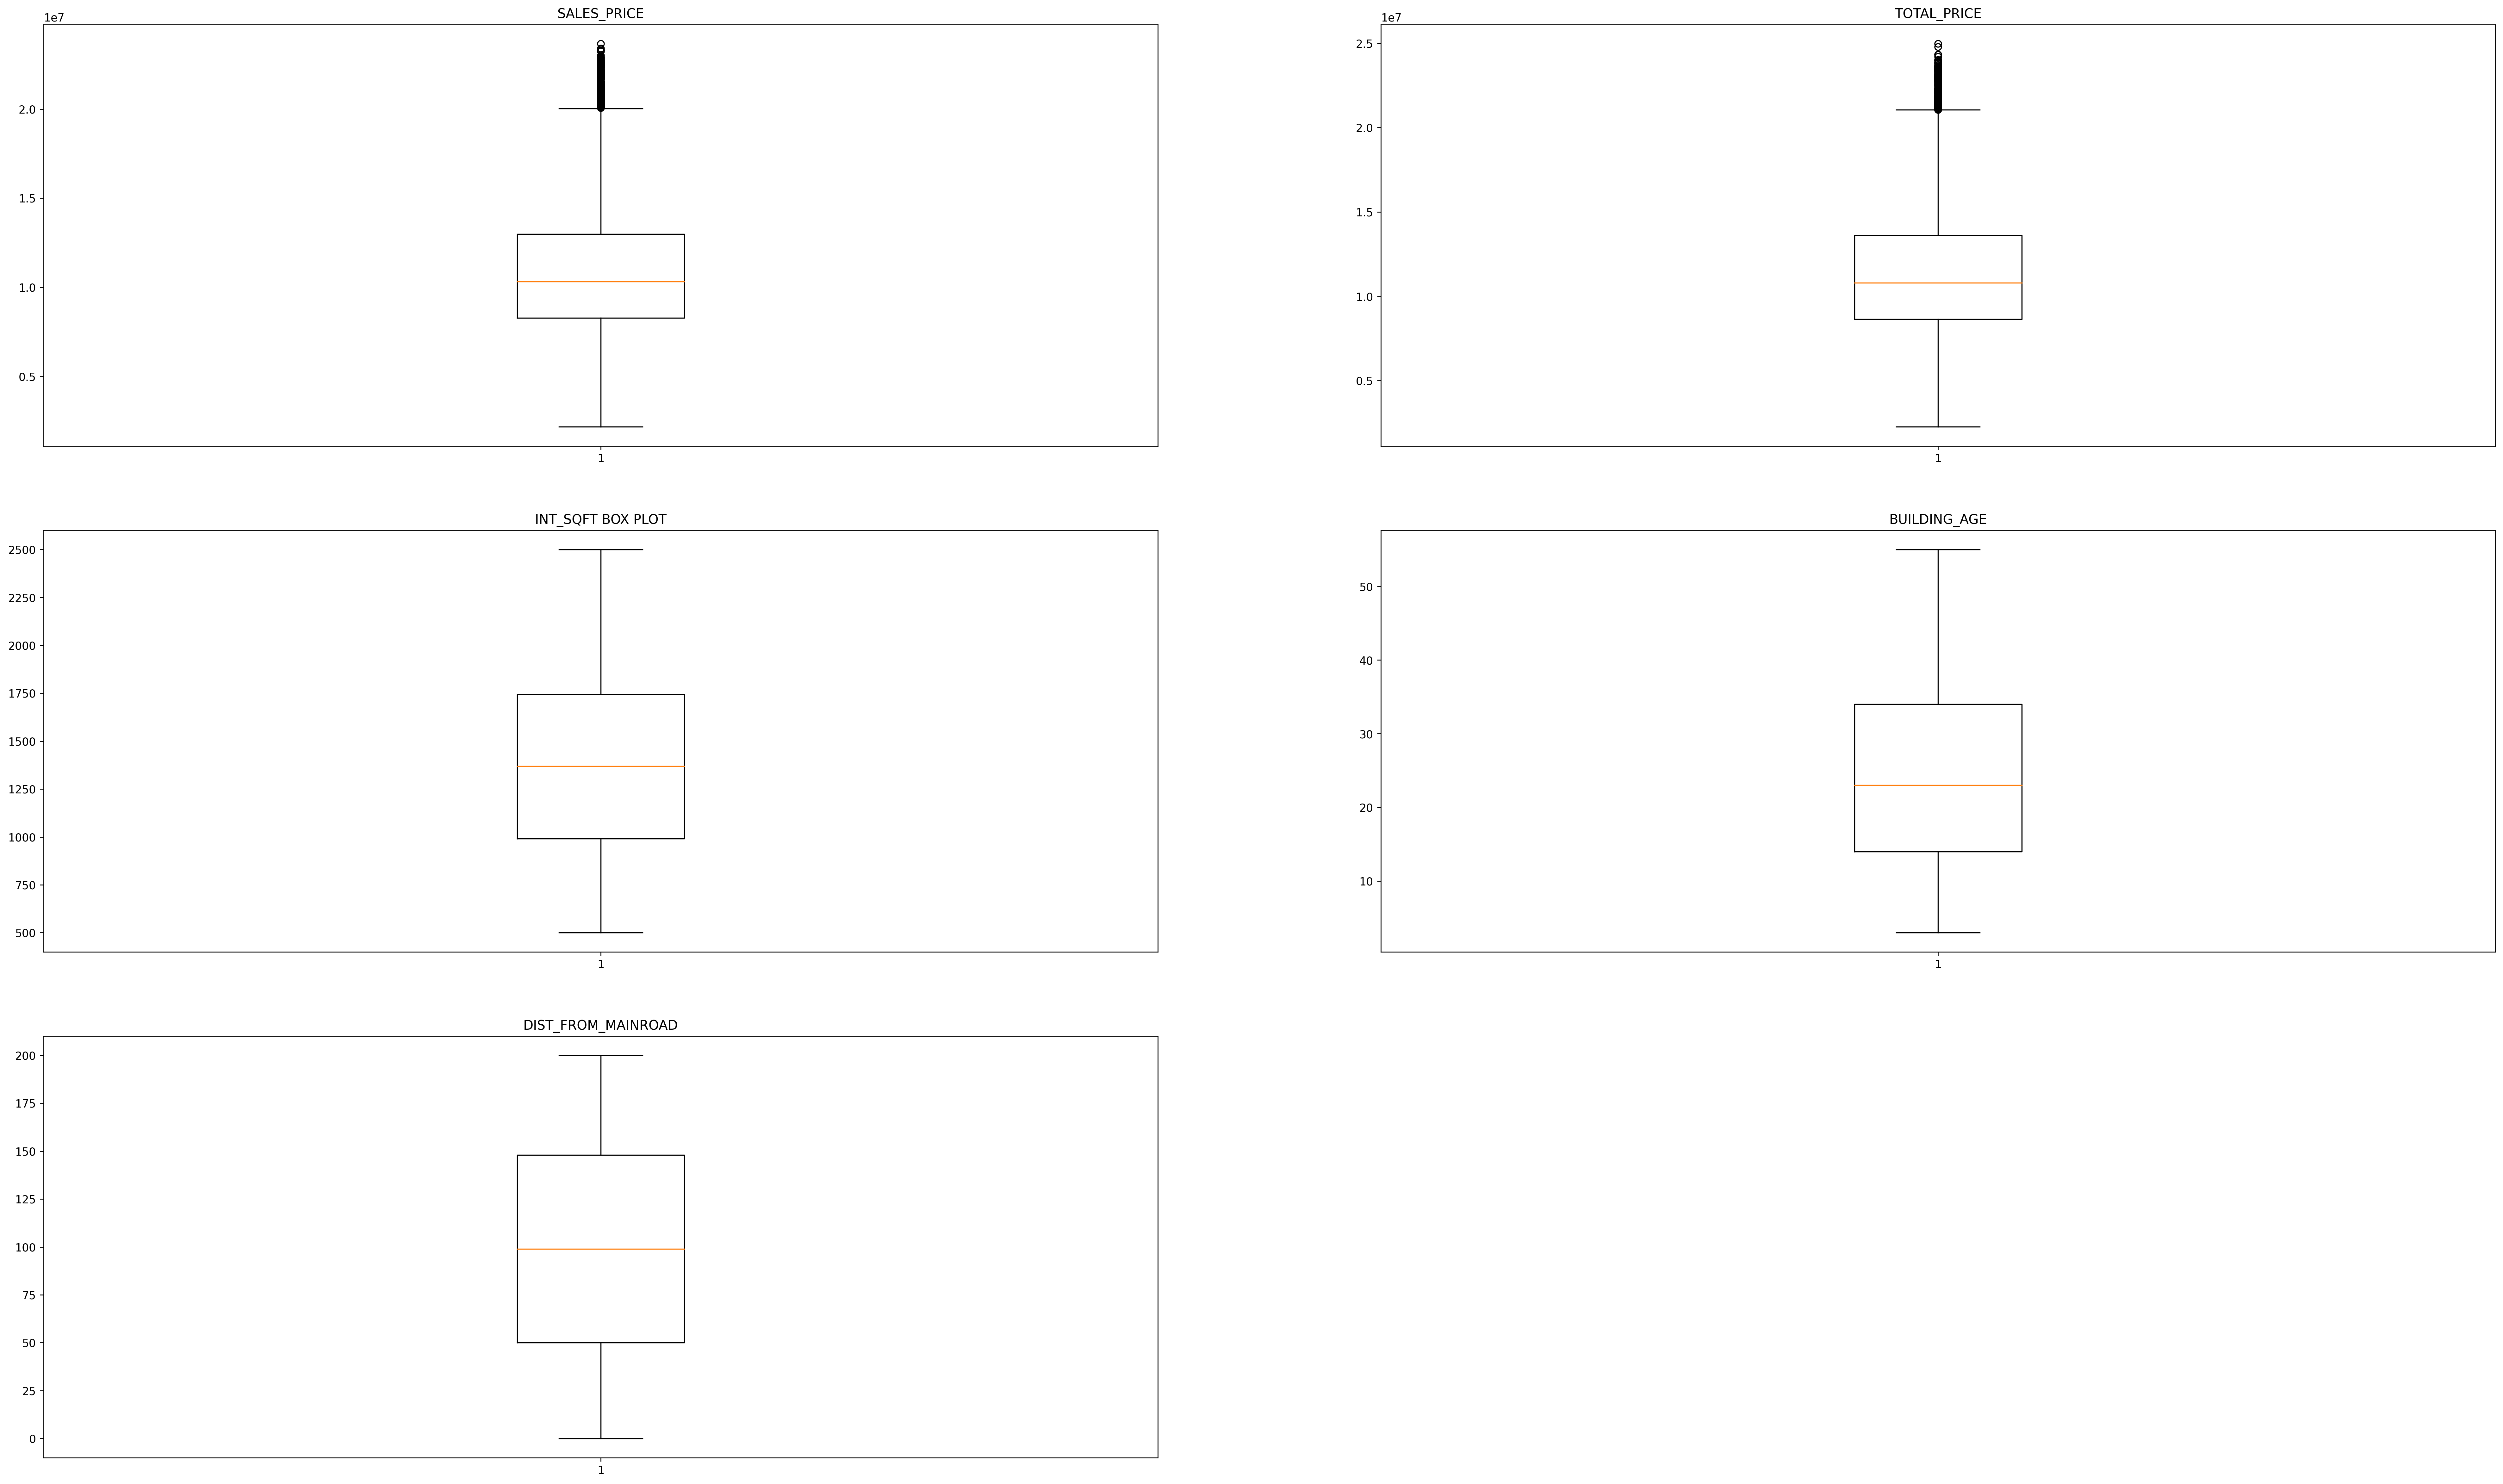

In [ ]:
plt.figure(figsize=(40, 24), dpi=250)

plt.subplot(3,2,1)
plt.boxplot(df["sales_price"])
plt.title("SALES_PRICE")

plt.subplot(3,2,2)
plt.boxplot(df["total_price"])
plt.title("TOTAL_PRICE")

plt.subplot(3,2,3)
plt.boxplot(df["int_sqft"])
plt.title("INT_SQFT BOX PLOT")

plt.subplot(3,2,4)
plt.boxplot(df["building_age"])
plt.title("BUILDING_AGE")

plt.subplot(3,2,5)
plt.boxplot(df["dist_mainroad"])
plt.title("DIST_FROM_MAINROAD")

plt.show()

**Target Variable**

In [ ]:
df["sales_price"].describe()

count    7.056000e+03
mean     1.088801e+07
std      3.769081e+06
min      2.156875e+06
25%      8.266790e+06
50%      1.031922e+07
75%      1.298148e+07
max      2.366734e+07
Name: sales_price, dtype: float64

In [ ]:
df["total_price"].describe()

count    7.056000e+03
mean     1.140579e+07
std      3.945567e+06
min      2.253935e+06
25%      8.639780e+06
50%      1.080447e+07
75%      1.360245e+07
max      2.496904e+07
Name: total_price, dtype: float64

**Exploratory Data Analysis(EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   prt_id         7056 non-null   object
 1   area           7056 non-null   object
 2   int_sqft       7056 non-null   int64 
 3   dist_mainroad  7056 non-null   int64 
 4   n_bedroom      7056 non-null   int64 
 5   n_bathroom     7056 non-null   int64 
 6   n_room         7056 non-null   int64 
 7   sale_cond      7056 non-null   object
 8   park_facil     7056 non-null   object
 9   buildtype      7056 non-null   object
 10  utility_avail  7056 non-null   object
 11  street         7056 non-null   object
 12  mzzone         7056 non-null   object
 13  qs_rooms       7056 non-null   int64 
 14  qs_bathroom    7056 non-null   int64 
 15  qs_bedroom     7056 non-null   int64 
 16  qs_overall     7056 non-null   int64 
 17  sales_price    7056 non-null   int64 
 18  total_price    7056 non-null

In [ ]:
df.head(3)

,prt_id,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,total_price,building_age
0,P03210,karapakkam,1004,131,1,1,3,abnormal,Yes,Commercial,All Pub,Paved,A,4,3,4,4,7600000,8124400,44
1,P09411,anna nagar,1986,26,2,1,5,abnormal,No,Commercial,All Pub,Gravel,RH,4,4,2,3,21717770,22781941,11
2,P01812,adyar,909,70,1,1,3,abnormal,Yes,Commercial,ELO,Gravel,RL,4,3,2,3,13159200,13672408,20


In [ ]:
import warnings
warnings.filterwarnings("ignore")

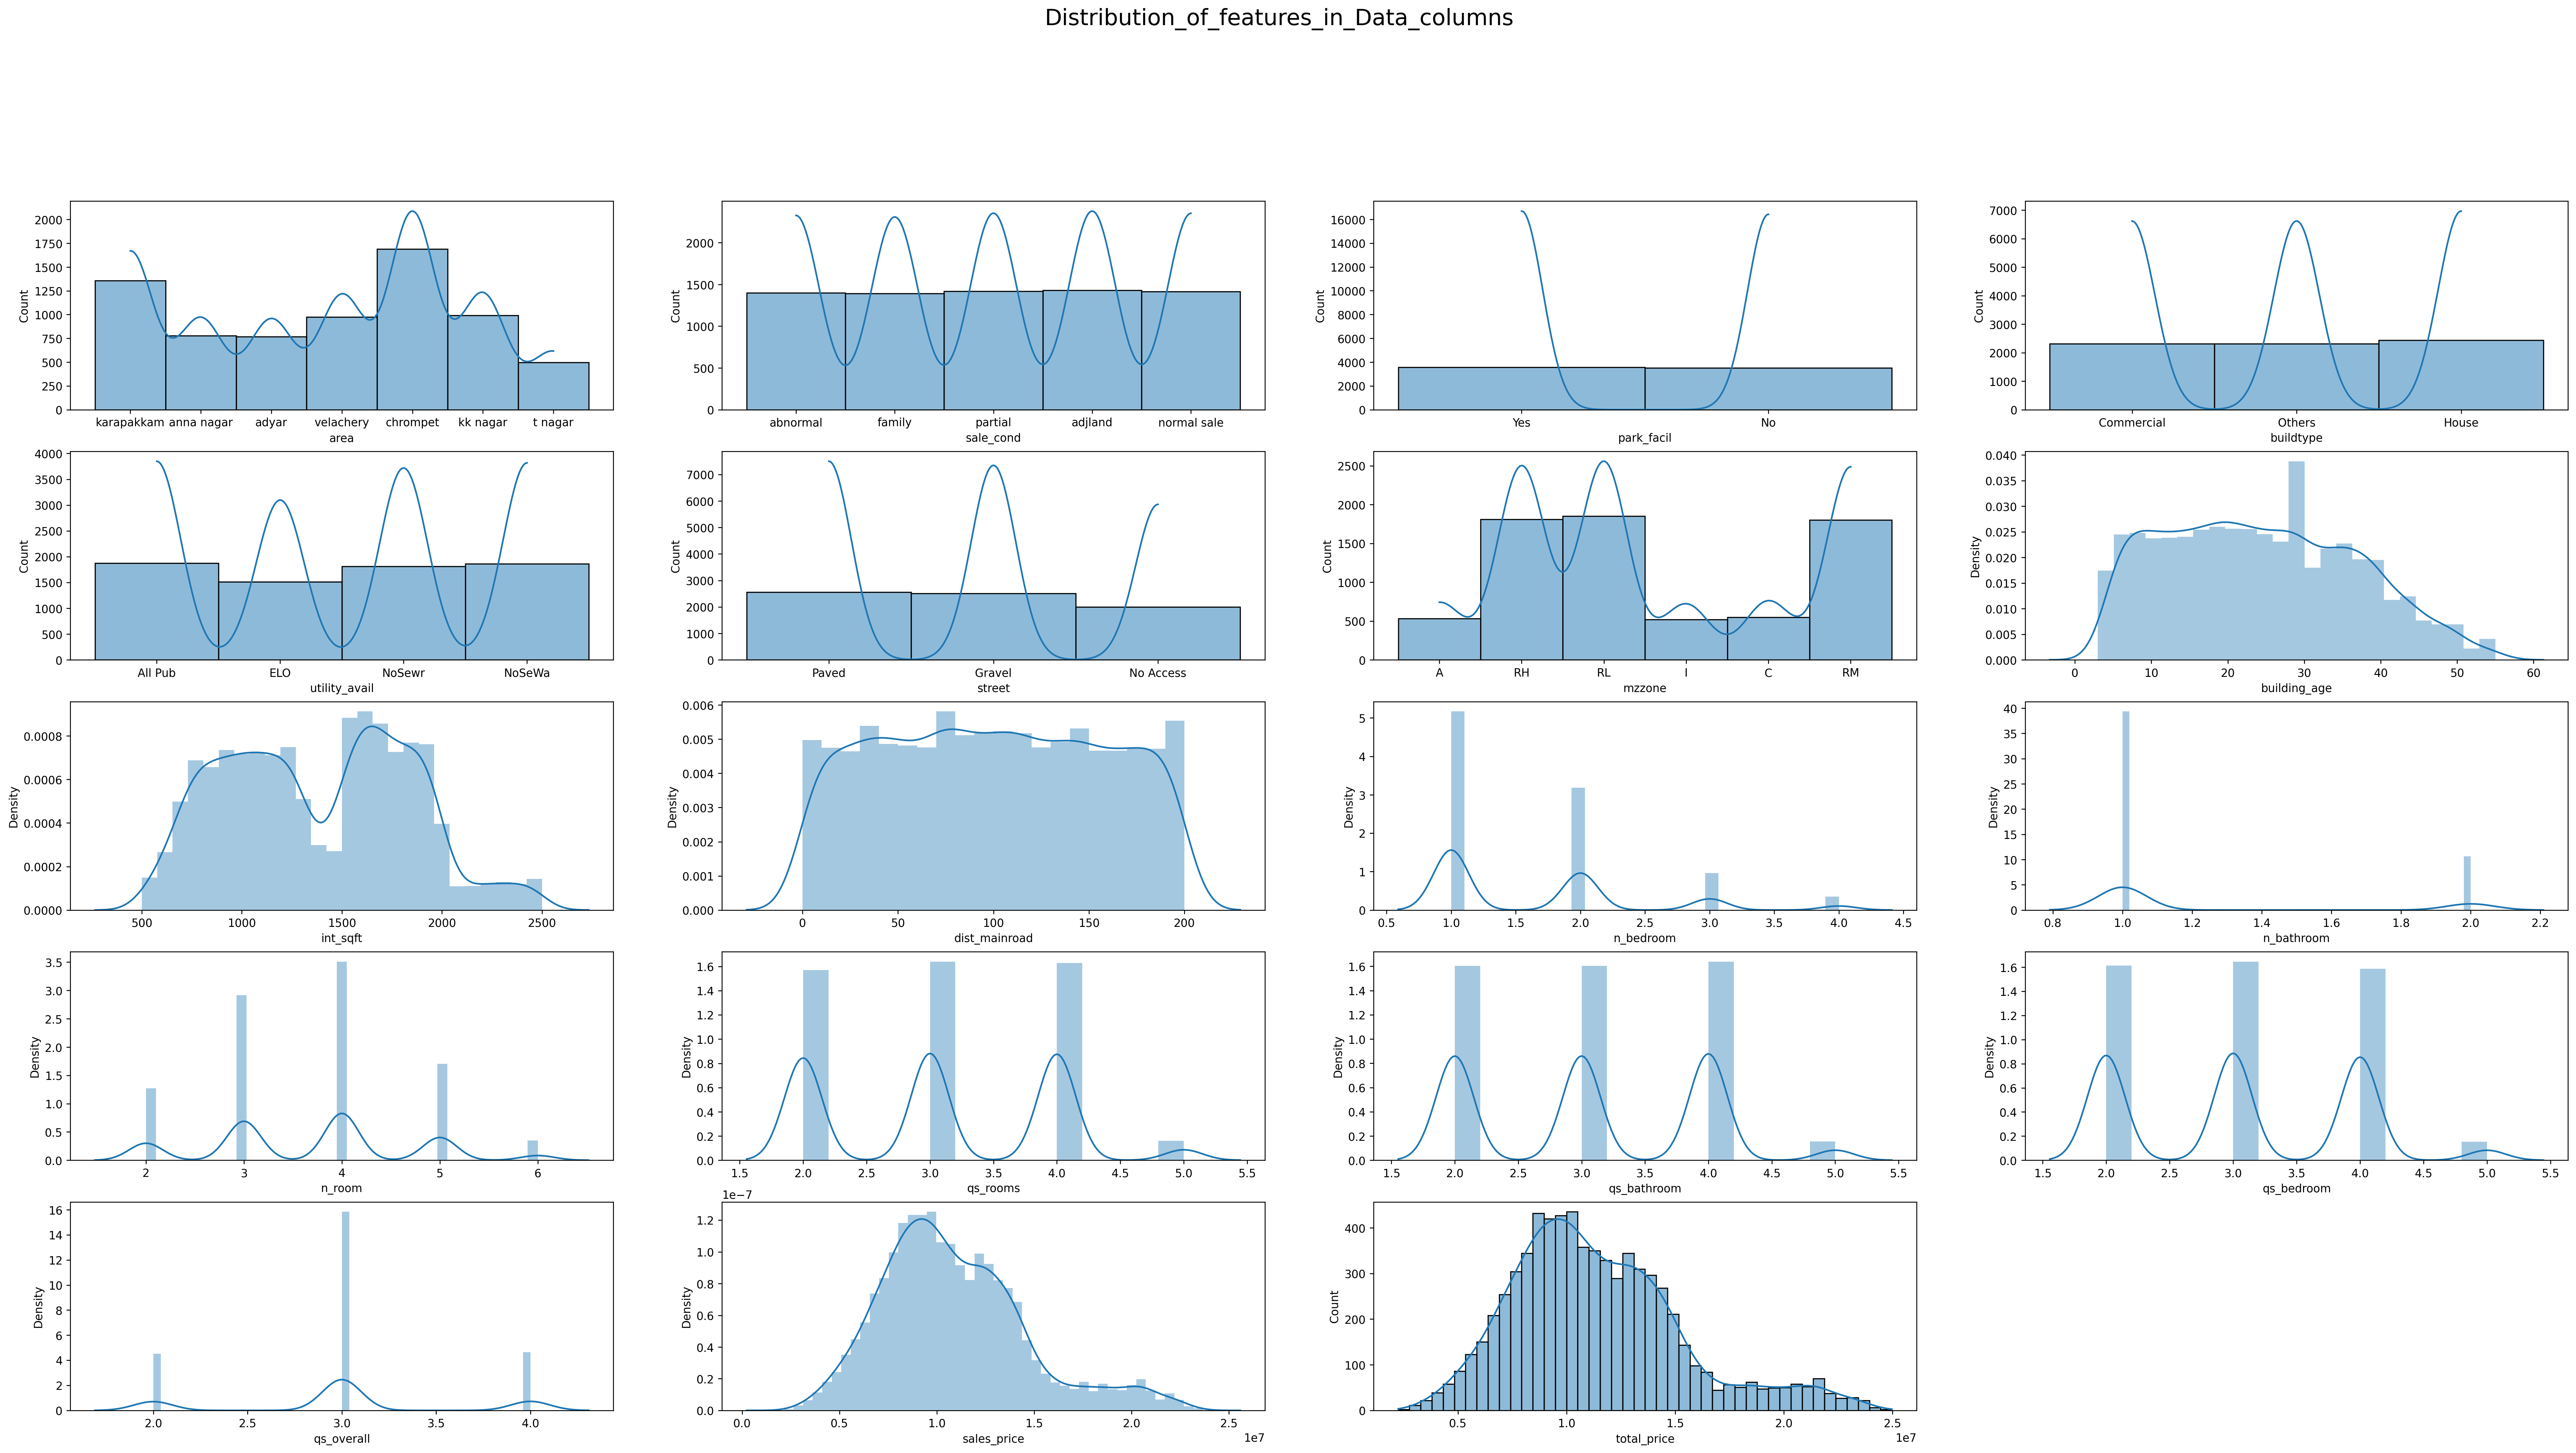

In [ ]:
plt.figure(figsize=(40, 24), dpi=250)

plt.subplot(641)
sns.histplot(df.area, kde=True)

plt.subplot(642)
sns.histplot(df.sale_cond,kde=True)

plt.subplot(643)
sns.histplot(df.park_facil,kde=True)

plt.subplot(644)
sns.histplot(df.buildtype,kde=True)

plt.subplot(645)
sns.histplot(df.utility_avail,kde=True)

plt.subplot(646)
sns.histplot(df.street,kde=True)

plt.subplot(647)
sns.histplot(df.mzzone,kde=True)

plt.subplot(648)
sns.distplot(df.building_age)

plt.subplot(649)
sns.distplot(df.int_sqft)

plt.subplot(6,4,10)
sns.distplot(df.dist_mainroad)

plt.subplot(6,4,11)
sns.distplot(df.n_bedroom)

plt.subplot(6,4,12)
sns.distplot(df.n_bathroom)

plt.subplot(6,4,13)
sns.distplot(df.n_room)

plt.subplot(6,4,14)
sns.distplot(df.qs_rooms)

plt.subplot(6,4,15)
sns.distplot(df.qs_bathroom)

plt.subplot(6,4,16)
sns.distplot(df.qs_bedroom)

plt.subplot(6,4,17)
sns.distplot(df.qs_overall)

plt.subplot(6,4,18)
sns.distplot(df.sales_price)

plt.subplot(6,4,19)
sns.histplot(df.total_price, kde=True)

plt.suptitle("Distribution_of_features_in_Data_columns", fontsize=20)
plt.show()

**Numerical and Continuous Data vs Target Variable**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   prt_id         7056 non-null   object
 1   area           7056 non-null   object
 2   int_sqft       7056 non-null   int64 
 3   dist_mainroad  7056 non-null   int64 
 4   n_bedroom      7056 non-null   int64 
 5   n_bathroom     7056 non-null   int64 
 6   n_room         7056 non-null   int64 
 7   sale_cond      7056 non-null   object
 8   park_facil     7056 non-null   object
 9   buildtype      7056 non-null   object
 10  utility_avail  7056 non-null   object
 11  street         7056 non-null   object
 12  mzzone         7056 non-null   object
 13  qs_rooms       7056 non-null   int64 
 14  qs_bathroom    7056 non-null   int64 
 15  qs_bedroom     7056 non-null   int64 
 16  qs_overall     7056 non-null   int64 
 17  sales_price    7056 non-null   int64 
 18  total_price    7056 non-null

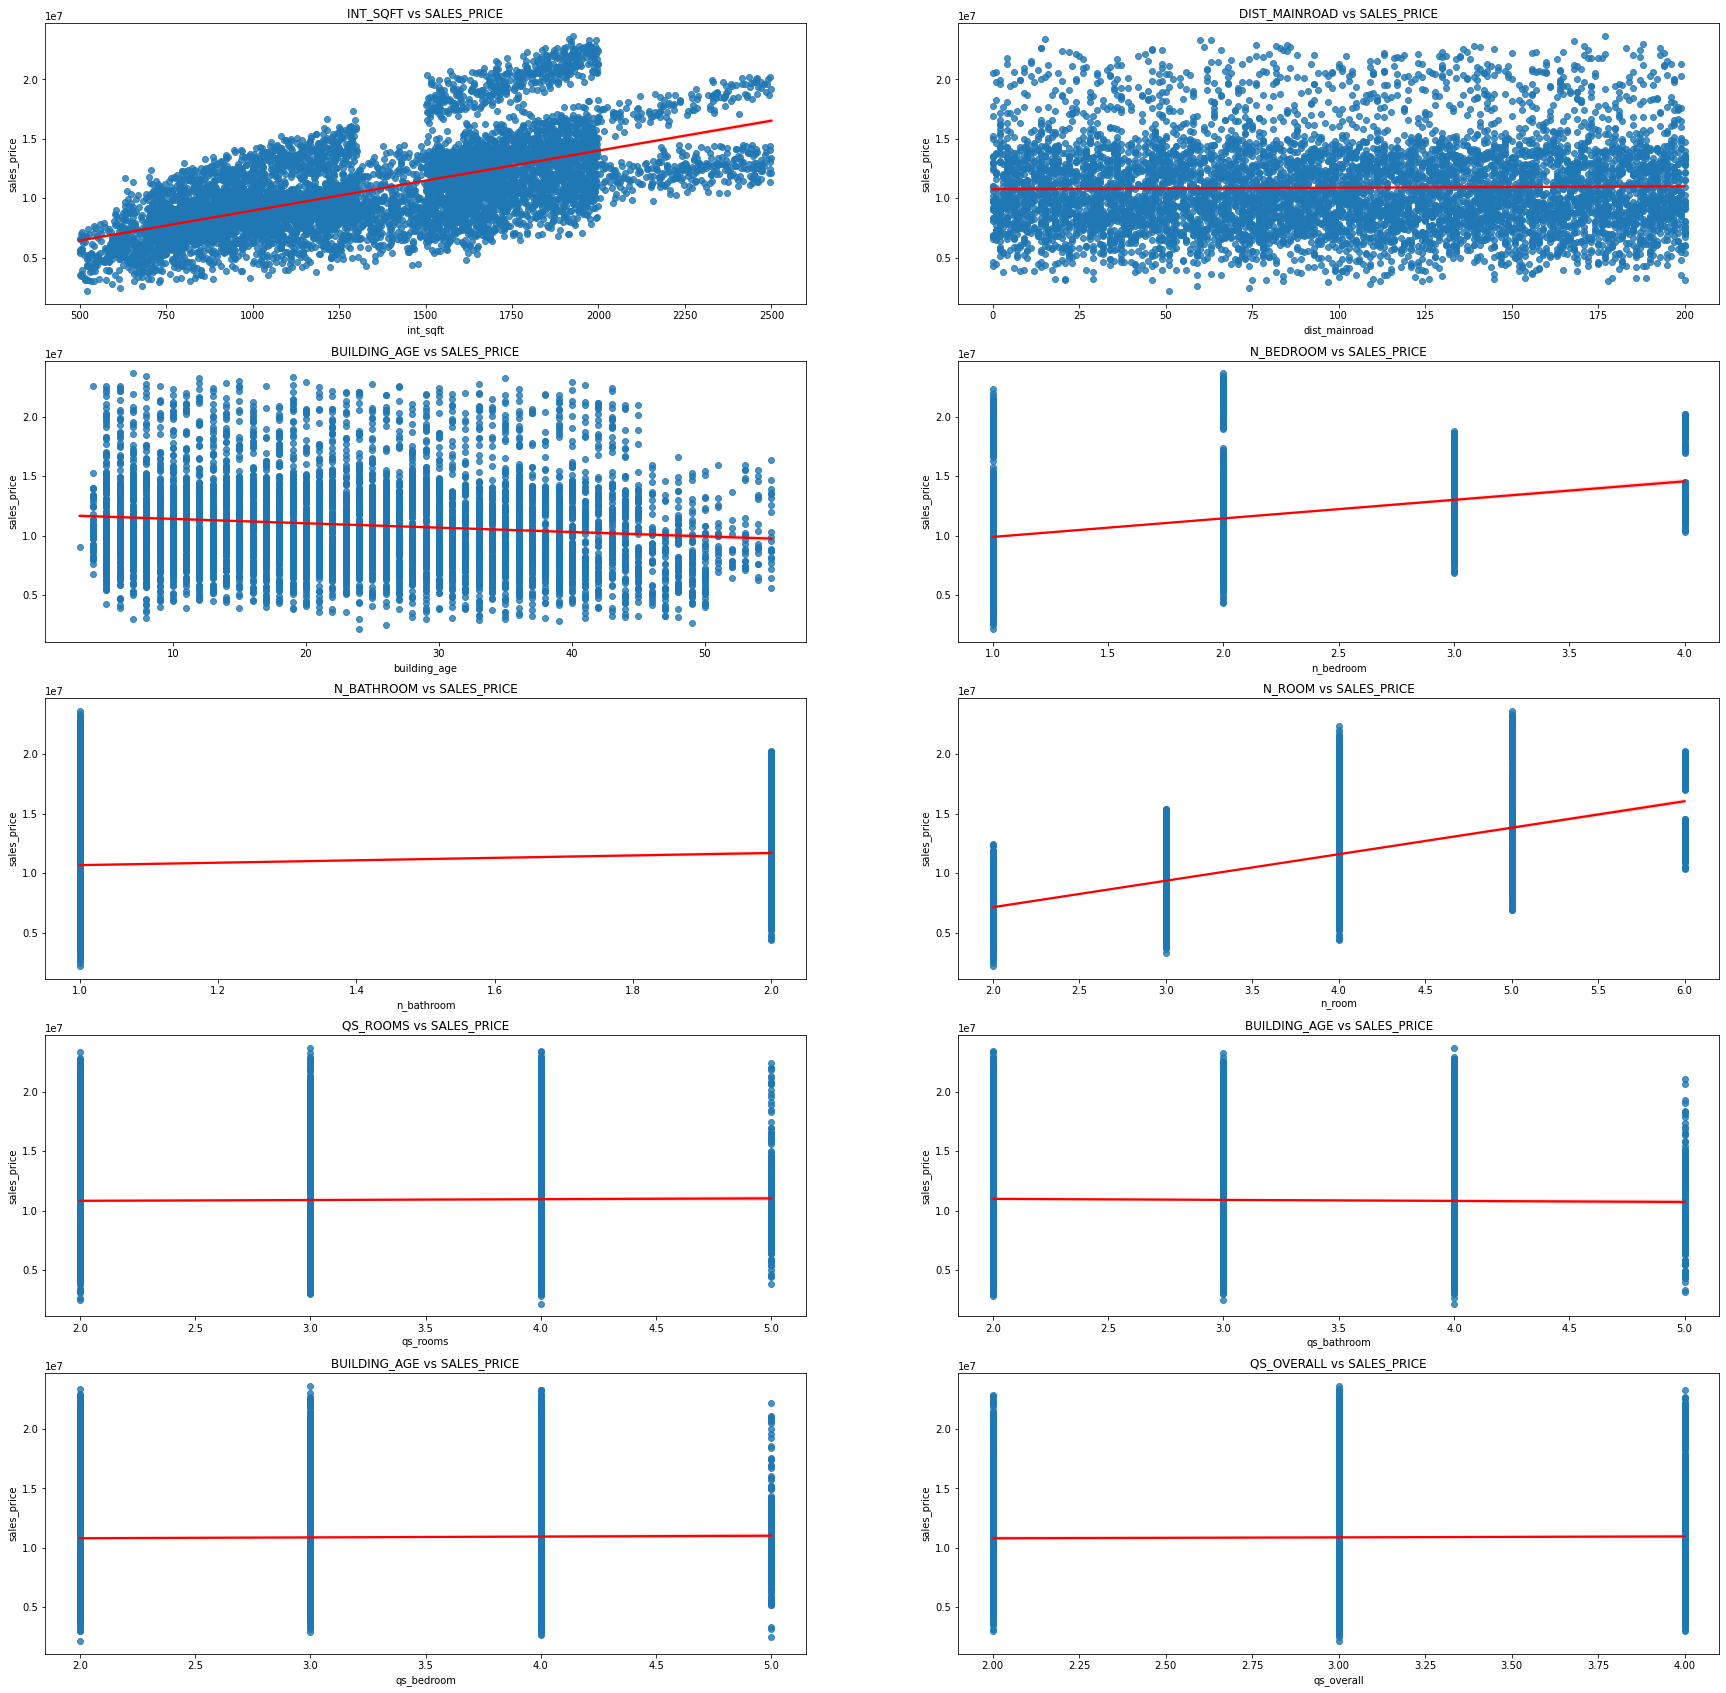

In [ ]:
plt.figure(figsize=(30,30))

plt.subplot(521)
sns.regplot(x =df['int_sqft'], y =df['sales_price'],line_kws={"color":"red"})
plt.title("INT_SQFT vs SALES_PRICE")

plt.subplot(522)
sns.regplot(x =df['dist_mainroad'], y=df['sales_price'],line_kws={"color":"red"})
plt.title("DIST_MAINROAD vs SALES_PRICE")

plt.subplot(523)
sns.regplot(x =df['building_age'], y =df['sales_price'],line_kws={"color":"red"})
plt.title("BUILDING_AGE vs SALES_PRICE")

plt.subplot(524)
sns.regplot(x =df['n_bedroom'], y =df['sales_price'],line_kws={"color":"red"})
plt.title("N_BEDROOM vs SALES_PRICE")

plt.subplot(525)
sns.regplot(x =df['n_bathroom'], y =df['sales_price'],line_kws={"color":"red"})
plt.title("N_BATHROOM vs SALES_PRICE")

plt.subplot(526)
sns.regplot(x =df['n_room'], y =df['sales_price'],line_kws={"color":"red"})
plt.title("N_ROOM vs SALES_PRICE")

plt.subplot(527)
sns.regplot(x =df['qs_rooms'], y =df['sales_price'],line_kws={"color":"red"})
plt.title("QS_ROOMS vs SALES_PRICE")

plt.subplot(528)
sns.regplot(x =df['qs_bathroom'], y =df['sales_price'],line_kws={"color":"red"})
plt.title("BUILDING_AGE vs SALES_PRICE")

plt.subplot(529)
sns.regplot(x =df['qs_bedroom'], y =df['sales_price'],line_kws={"color":"red"})
plt.title("BUILDING_AGE vs SALES_PRICE")

plt.subplot(5,2,10)
sns.regplot(x =df['qs_overall'], y =df['sales_price'],line_kws={"color":"red"})
plt.title("QS_OVERALL vs SALES_PRICE")

plt.show()

**The columns "prt_id", "qs_rooms", "qs_bathroom", "qs_bedroom", "qs_overall" we don't find any relation it, so will be dropping those columns from the dataset. These columns willnot be useful while building the ML moel**

In [ ]:
df=df.drop(["prt_id", "qs_rooms", "qs_bathroom", "qs_bedroom", "qs_overall"], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   area           7056 non-null   object
 1   int_sqft       7056 non-null   int64 
 2   dist_mainroad  7056 non-null   int64 
 3   n_bedroom      7056 non-null   int64 
 4   n_bathroom     7056 non-null   int64 
 5   n_room         7056 non-null   int64 
 6   sale_cond      7056 non-null   object
 7   park_facil     7056 non-null   object
 8   buildtype      7056 non-null   object
 9   utility_avail  7056 non-null   object
 10  street         7056 non-null   object
 11  mzzone         7056 non-null   object
 12  sales_price    7056 non-null   int64 
 13  total_price    7056 non-null   int64 
 14  building_age   7056 non-null   int64 
dtypes: int64(8), object(7)
memory usage: 1.1+ MB


In [ ]:
df.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,sales_price,total_price,building_age
0,karapakkam,1004,131,1,1,3,abnormal,Yes,Commercial,All Pub,Paved,A,7600000,8124400,44
1,anna nagar,1986,26,2,1,5,abnormal,No,Commercial,All Pub,Gravel,RH,21717770,22781941,11
2,adyar,909,70,1,1,3,abnormal,Yes,Commercial,ELO,Gravel,RL,13159200,13672408,20
3,velachery,1855,14,3,2,5,family,No,Others,NoSewr,Paved,I,9630290,10063653,22
4,karapakkam,1226,84,1,1,3,abnormal,Yes,Others,All Pub,Gravel,C,7406250,7717313,30


**Categorical Data VS Target**

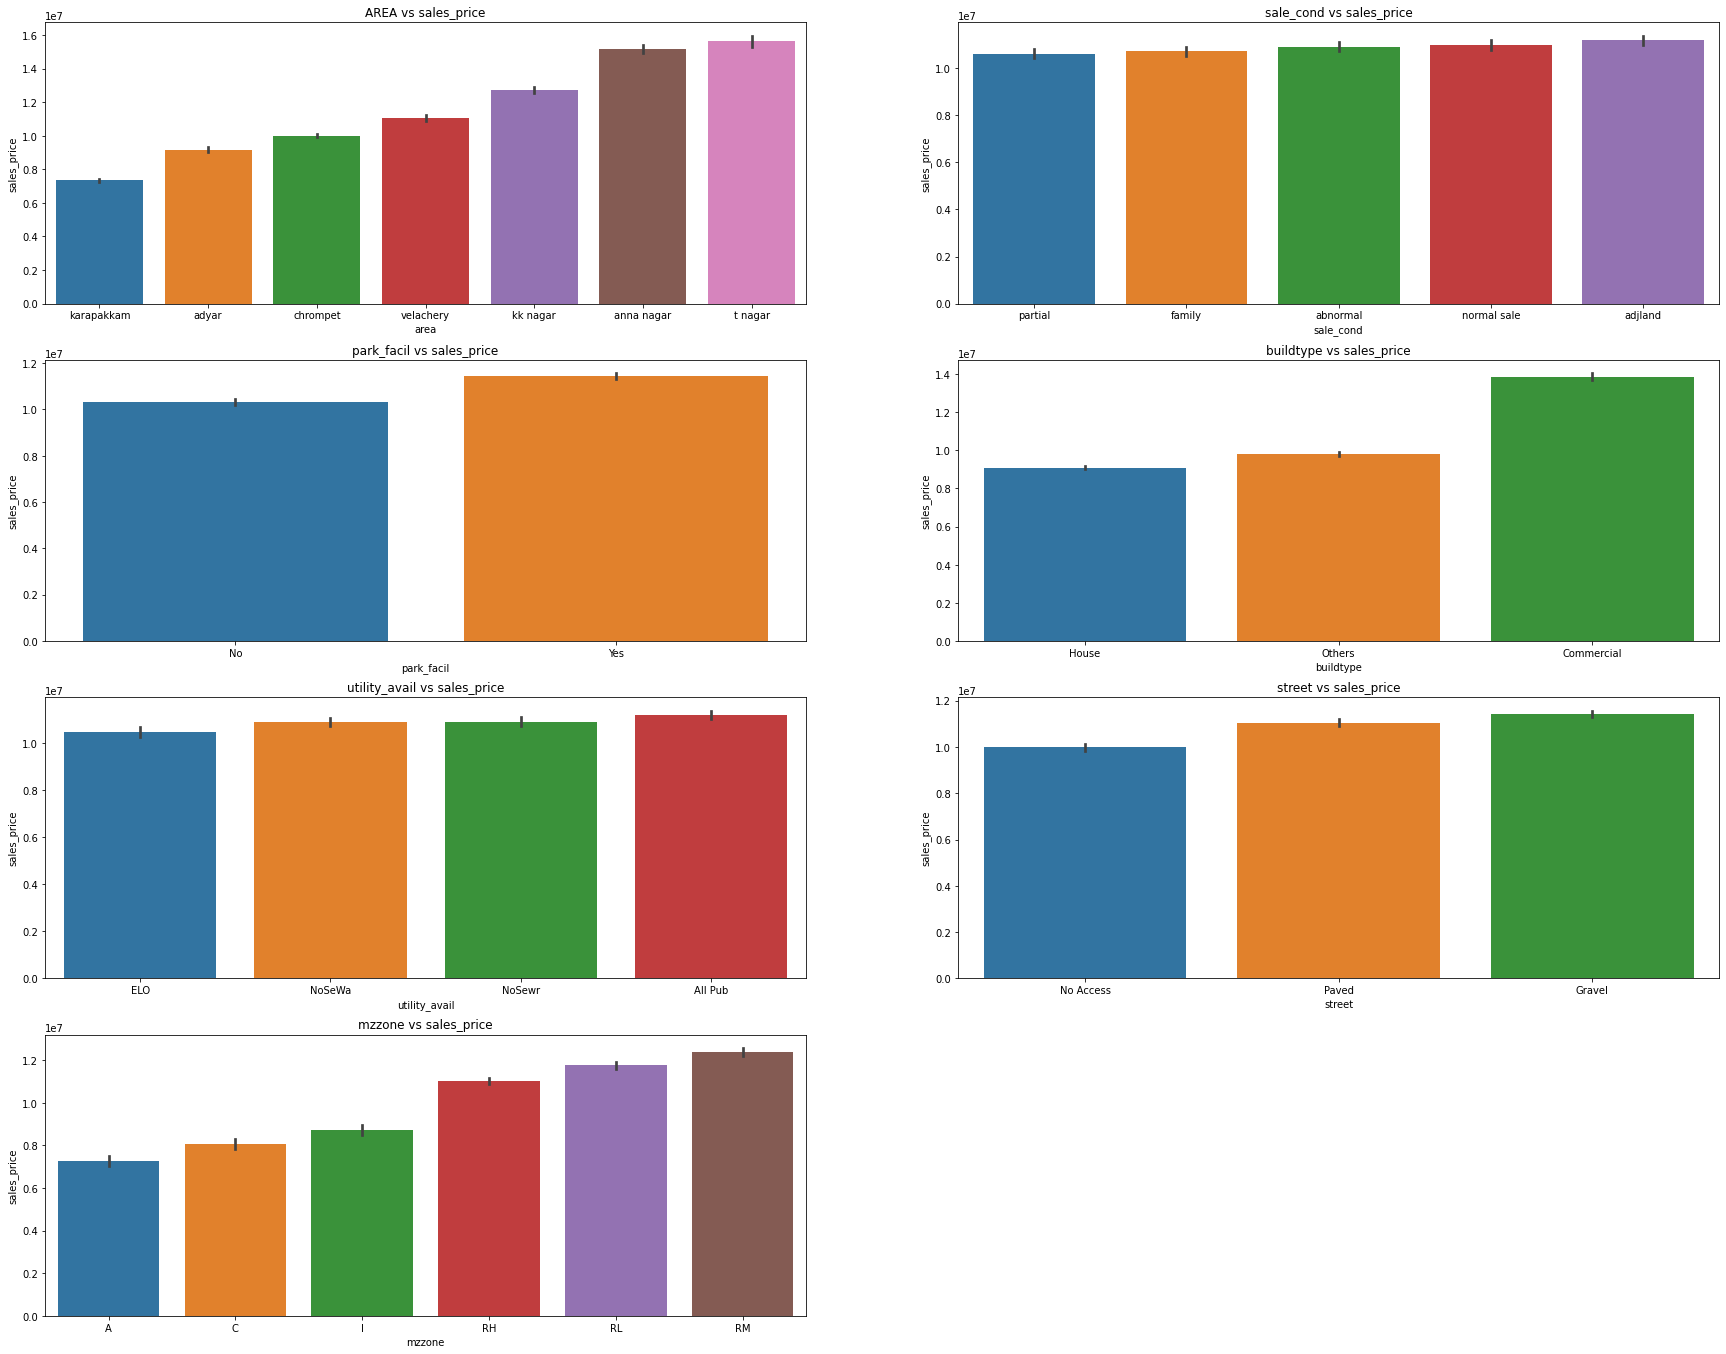

In [ ]:
plt.figure(figsize=(30,30))

plt.subplot(5,2,1)
sns.barplot(x=df.area,y=df.sales_price,order=df.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area'])
plt.title('AREA vs sales_price')

plt.subplot(5,2,2)
sns.barplot(x=df.sale_cond,y=df.sales_price,order=df.groupby('sale_cond')['sales_price'].mean().reset_index().sort_values('sales_price')['sale_cond'])
plt.title('sale_cond vs sales_price')

plt.subplot(5,2,3)
sns.barplot(x=df.park_facil,y=df.sales_price,order=df.groupby('park_facil')['sales_price'].mean().reset_index().sort_values('sales_price')['park_facil'])
plt.title('park_facil vs sales_price')

plt.subplot(5,2,4)
sns.barplot(x=df.buildtype,y=df.sales_price,order=df.groupby('buildtype')['sales_price'].mean().reset_index().sort_values('sales_price')['buildtype'])
plt.title('buildtype vs sales_price')

plt.subplot(5,2,5)
sns.barplot(x=df.utility_avail,y=df.sales_price,order=df.groupby('utility_avail')['sales_price'].mean().reset_index().sort_values('sales_price')['utility_avail'])
plt.title('utility_avail vs sales_price')

plt.subplot(5,2,6)
sns.barplot(x=df.street,y=df.sales_price,order=df.groupby('street')['sales_price'].mean().reset_index().sort_values('sales_price')['street'])
plt.title('street vs sales_price')

plt.subplot(5,2,7)
sns.barplot(x=df.mzzone,y=df.sales_price,order=df.groupby('mzzone')['sales_price'].mean().reset_index().sort_values('sales_price')['mzzone'])
plt.title('mzzone vs sales_price')

plt.show()

**Encoding**

In [ ]:
df.isnull().sum()

area             0
int_sqft         0
dist_mainroad    0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
buildtype        0
utility_avail    0
street           0
mzzone           0
sales_price      0
total_price      0
building_age     0
dtype: int64

In [ ]:
df1=df.copy()

In [ ]:
df

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,sales_price,total_price,building_age
0,karapakkam,1004,131,1,1,3,abnormal,Yes,Commercial,All Pub,Paved,A,7600000,8124400,44
1,anna nagar,1986,26,2,1,5,abnormal,No,Commercial,All Pub,Gravel,RH,21717770,22781941,11
2,adyar,909,70,1,1,3,abnormal,Yes,Commercial,ELO,Gravel,RL,13159200,13672408,20
3,velachery,1855,14,3,2,5,family,No,Others,NoSewr,Paved,I,9630290,10063653,22
4,karapakkam,1226,84,1,1,3,abnormal,Yes,Others,All Pub,Gravel,C,7406250,7717313,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,karapakkam,598,51,1,1,2,adjland,No,Others,ELO,No Access,RM,5353000,5668827,49
7105,velachery,1897,52,3,2,5,family,Yes,Others,NoSeWa,No Access,RH,10818480,11370222,9
7106,velachery,1614,152,2,1,4,normal sale,No,House,NoSeWa,Gravel,I,8351410,8835792,28
7107,karapakkam,787,40,1,1,2,partial,Yes,Commercial,ELO,Paved,RL,8507000,9051448,32


In [ ]:
df1

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,sales_price,total_price,building_age
0,karapakkam,1004,131,1,1,3,abnormal,Yes,Commercial,All Pub,Paved,A,7600000,8124400,44
1,anna nagar,1986,26,2,1,5,abnormal,No,Commercial,All Pub,Gravel,RH,21717770,22781941,11
2,adyar,909,70,1,1,3,abnormal,Yes,Commercial,ELO,Gravel,RL,13159200,13672408,20
3,velachery,1855,14,3,2,5,family,No,Others,NoSewr,Paved,I,9630290,10063653,22
4,karapakkam,1226,84,1,1,3,abnormal,Yes,Others,All Pub,Gravel,C,7406250,7717313,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,karapakkam,598,51,1,1,2,adjland,No,Others,ELO,No Access,RM,5353000,5668827,49
7105,velachery,1897,52,3,2,5,family,Yes,Others,NoSeWa,No Access,RH,10818480,11370222,9
7106,velachery,1614,152,2,1,4,normal sale,No,House,NoSeWa,Gravel,I,8351410,8835792,28
7107,karapakkam,787,40,1,1,2,partial,Yes,Commercial,ELO,Paved,RL,8507000,9051448,32


In [ ]:
print(df.utility_avail.unique())
print(df.area.unique())
print(df.sale_cond.unique())
print(df.park_facil.unique())
print(df.street.unique())
print(df.mzzone.unique())

['All Pub' 'ELO' 'NoSewr' 'NoSeWa']
['karapakkam' 'anna nagar' 'adyar' 'velachery' 'chrompet' 'kk nagar'
 't nagar']
['abnormal' 'family' 'partial' 'adjland' 'normal sale']
['Yes' 'No']
['Paved' 'Gravel' 'No Access']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [ ]:
df1.area = df1.area.replace({'karapakkam': 1,
                           'adyar': 2, 
                           'chrompet' : 3,
                           'velachery' : 4,
                           'kk nagar' : 5, 
                           'anna nagar' : 6,
                           't nagar' : 7})

df1.sale_cond = df1.sale_cond.map({'partial' : 1, 'family' : 2, 'abnormal' : 3, 'normal sale' : 4, 'adjland' : 5})
df1.park_facil = df1.park_facil.map({'Yes':1, 'No':0})
df1.utility_avail = df1.utility_avail.map({'ELO' : 1, 'NoSeWa' : 2, 'NoSewr' : 3, 'All Pub' : 4}) 
df1.street = df1.street.map({'No Access' : 1, 'Paved' : 2, 'Gravel' : 3})
df1.mzzone = df1.mzzone.map({'A' : 1,'C' : 2,'I' : 3,'RL' : 5,'RH' : 4,'RM' : 6})

In [ ]:
df

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,sales_price,total_price,building_age
0,karapakkam,1004,131,1,1,3,abnormal,Yes,Commercial,All Pub,Paved,A,7600000,8124400,44
1,anna nagar,1986,26,2,1,5,abnormal,No,Commercial,All Pub,Gravel,RH,21717770,22781941,11
2,adyar,909,70,1,1,3,abnormal,Yes,Commercial,ELO,Gravel,RL,13159200,13672408,20
3,velachery,1855,14,3,2,5,family,No,Others,NoSewr,Paved,I,9630290,10063653,22
4,karapakkam,1226,84,1,1,3,abnormal,Yes,Others,All Pub,Gravel,C,7406250,7717313,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,karapakkam,598,51,1,1,2,adjland,No,Others,ELO,No Access,RM,5353000,5668827,49
7105,velachery,1897,52,3,2,5,family,Yes,Others,NoSeWa,No Access,RH,10818480,11370222,9
7106,velachery,1614,152,2,1,4,normal sale,No,House,NoSeWa,Gravel,I,8351410,8835792,28
7107,karapakkam,787,40,1,1,2,partial,Yes,Commercial,ELO,Paved,RL,8507000,9051448,32


In [ ]:
df1.utility_avail.isnull().sum()

0

In [ ]:
df1 = pd.get_dummies(df1, columns=["buildtype"])

In [ ]:
df1

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,utility_avail,street,mzzone,sales_price,total_price,building_age,buildtype_Commercial,buildtype_House,buildtype_Others
0,1,1004,131,1,1,3,3,1,4,2,1,7600000,8124400,44,1,0,0
1,6,1986,26,2,1,5,3,0,4,3,4,21717770,22781941,11,1,0,0
2,2,909,70,1,1,3,3,1,1,3,5,13159200,13672408,20,1,0,0
3,4,1855,14,3,2,5,2,0,3,2,3,9630290,10063653,22,0,0,1
4,1,1226,84,1,1,3,3,1,4,3,2,7406250,7717313,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,51,1,1,2,5,0,1,1,6,5353000,5668827,49,0,0,1
7105,4,1897,52,3,2,5,2,1,2,1,4,10818480,11370222,9,0,0,1
7106,4,1614,152,2,1,4,4,0,2,3,3,8351410,8835792,28,0,1,0
7107,1,787,40,1,1,2,1,1,1,2,5,8507000,9051448,32,1,0,0


In [ ]:
df.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,sales_price,total_price,building_age
0,karapakkam,1004,131,1,1,3,abnormal,Yes,Commercial,All Pub,Paved,A,7600000,8124400,44
1,anna nagar,1986,26,2,1,5,abnormal,No,Commercial,All Pub,Gravel,RH,21717770,22781941,11
2,adyar,909,70,1,1,3,abnormal,Yes,Commercial,ELO,Gravel,RL,13159200,13672408,20
3,velachery,1855,14,3,2,5,family,No,Others,NoSewr,Paved,I,9630290,10063653,22
4,karapakkam,1226,84,1,1,3,abnormal,Yes,Others,All Pub,Gravel,C,7406250,7717313,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   area           7056 non-null   object
 1   int_sqft       7056 non-null   int64 
 2   dist_mainroad  7056 non-null   int64 
 3   n_bedroom      7056 non-null   int64 
 4   n_bathroom     7056 non-null   int64 
 5   n_room         7056 non-null   int64 
 6   sale_cond      7056 non-null   object
 7   park_facil     7056 non-null   object
 8   buildtype      7056 non-null   object
 9   utility_avail  7056 non-null   object
 10  street         7056 non-null   object
 11  mzzone         7056 non-null   object
 12  sales_price    7056 non-null   int64 
 13  total_price    7056 non-null   int64 
 14  building_age   7056 non-null   int64 
dtypes: int64(8), object(7)
memory usage: 1.1+ MB


**Splitting the data for training and testing**

In [ ]:
X=df1.drop(['sales_price'],axis=1)
Y=df1['sales_price']

In [ ]:
X.shape

(7056, 16)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [ ]:
x_train.shape

(5644, 16)

In [ ]:
x_train.isnull().sum()

area                    0
int_sqft                0
dist_mainroad           0
n_bedroom               0
n_bathroom              0
n_room                  0
sale_cond               0
park_facil              0
utility_avail           0
street                  0
mzzone                  0
total_price             0
building_age            0
buildtype_Commercial    0
buildtype_House         0
buildtype_Others        0
dtype: int64

In [ ]:
x_test.shape

(1412, 16)

#**1)Linear Regression**

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([ 8843611.18094002,  8838332.63051002,  5063769.16814969, ...,
        7668945.07383303, 12470910.33380092, 12032611.15332252])

In [ ]:
Result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Result

,Actual,Predicted
1074,8850660,8.843611e+06
1127,8845600,8.838333e+06
3726,5038250,5.063769e+06
762,14834920,1.465974e+07
5351,13370400,1.320705e+07
...,...,...
486,10613930,1.058043e+07
4780,9255095,9.334163e+06
5465,7625250,7.668945e+06
4668,12514000,1.247091e+07


In [ ]:
Result_lr = metrics.r2_score(y_test,y_pred)
print('R2- SCORE for Linear Regression:', round((Result_lr*100),2),"%")

R2- SCORE for Linear Regression: 99.95 %


#**2) KNearest Neighbour**

Scaling should be done to this model.



In [ ]:
scaler = StandardScaler() 
scaler.fit(x_train) 

StandardScaler()

In [ ]:
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,15,20]:
  knn = KNeighborsRegressor(i) 
  knn.fit(X_train,y_train)
  print("K value  :" , i, "score : ", metrics.r2_score(y_test,y_pred))

K value  : 1 score :  0.9995189934843839
K value  : 2 score :  0.9995189934843839
K value  : 3 score :  0.9995189934843839
K value  : 4 score :  0.9995189934843839
K value  : 5 score :  0.9995189934843839
K value  : 6 score :  0.9995189934843839
K value  : 7 score :  0.9995189934843839
K value  : 8 score :  0.9995189934843839
K value  : 9 score :  0.9995189934843839
K value  : 10 score :  0.9995189934843839
K value  : 15 score :  0.9995189934843839
K value  : 20 score :  0.9995189934843839


In [ ]:
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
y_pred_KNN = KNN.predict(X_test)
y_pred_KNN

array([ 8492944.,  9123138.,  4194900., ...,  7450352., 13253125.,
       12126796.])

In [ ]:
result_KNN= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_KNN})
result_KNN

,Actual,Predicted
1074,8850660,8492944.0
1127,8845600,9123138.0
3726,5038250,4194900.0
762,14834920,14123542.0
5351,13370400,13311541.0
...,...,...
486,10613930,9146397.0
4780,9255095,9249448.0
5465,7625250,7450352.0
4668,12514000,13253125.0


In [ ]:
RESULT_KNN1 = metrics.r2_score(y_test,y_pred_KNN)
print('R2- SCORE FOR KNN MODEL:', round((RESULT_KNN1*100),2),"%")

R2- SCORE FOR KNN MODEL: 96.34 %


#**3) Decision Tree Model**

Scaling should be done to this model(complsory).

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
for k in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,100]:
  dt = DecisionTreeRegressor(max_depth=k)
  dt.fit(x_train, y_train)
  valAccuracy = cross_val_score(dt, x_train, y_train, cv=10, scoring = make_scorer(metrics.r2_score))
  print("DEPTH: ",k,"R2-Score: ",np.mean(valAccuracy))

DEPTH:  1 R2-Score:  0.6282348739525399
DEPTH:  2 R2-Score:  0.9016915467985445
DEPTH:  3 R2-Score:  0.971486194464088
DEPTH:  4 R2-Score:  0.99203937049503
DEPTH:  5 R2-Score:  0.9973801318040871
DEPTH:  6 R2-Score:  0.9987768281012019
DEPTH:  7 R2-Score:  0.9991132600169477
DEPTH:  8 R2-Score:  0.9992406381386856
DEPTH:  9 R2-Score:  0.9992155409115998
DEPTH:  10 R2-Score:  0.9991706796070658
DEPTH:  20 R2-Score:  0.9989872292361438
DEPTH:  30 R2-Score:  0.9990151895638517
DEPTH:  40 R2-Score:  0.9990210158822566
DEPTH:  50 R2-Score:  0.999003130416793
DEPTH:  60 R2-Score:  0.9990075856801175
DEPTH:  100 R2-Score:  0.9990023539952043


In [ ]:
DT = DecisionTreeRegressor(max_depth=30)
DT.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=30)

In [ ]:
y_pred_dt = DT.predict(x_test)
y_pred_dt

array([ 8824280.,  8905710.,  5016625., ...,  7677000., 12393500.,
       12046300.])

In [ ]:
result_DT=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_dt})
result_DT

,Actual,Predicted
1074,8850660,8824280.0
1127,8845600,8905710.0
3726,5038250,5016625.0
762,14834920,14804680.0
5351,13370400,13297100.0
...,...,...
486,10613930,10581040.0
4780,9255095,9252340.0
5465,7625250,7677000.0
4668,12514000,12393500.0


In [ ]:
from sklearn import metrics
DT1 = metrics.r2_score(y_test,y_pred_dt)
print('R2- SCORE FOR DECISION TREE MODEL:', round((DT1*100),2),"%")

R2- SCORE FOR DECISION TREE MODEL: 99.91 %


#**4) XG BOOST MODEL**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [ ]:
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train,y_train) #train the model
  model.score(x_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train)))

Learning rate :  0.01  Train score :  -0.27092491407933506  Cross-Val score :  -0.27470062221664826
Learning rate :  0.02  Train score :  0.8301178574279036  Cross-Val score :  0.8291728152419895
Learning rate :  0.03  Train score :  0.9771809381326603  Cross-Val score :  0.9768515784081175
Learning rate :  0.04  Train score :  0.9965750993907588  Cross-Val score :  0.9963639927700199
Learning rate :  0.05  Train score :  0.9991840242455657  Cross-Val score :  0.9990062273940452
Learning rate :  0.1  Train score :  0.9996180597801252  Cross-Val score :  0.999459119332139
Learning rate :  0.11  Train score :  0.9996044679131756  Cross-Val score :  0.999447594079325
Learning rate :  0.12  Train score :  0.9995956706036561  Cross-Val score :  0.9994170004502296
Learning rate :  0.13  Train score :  0.9995770996932272  Cross-Val score :  0.9993882586753913
Learning rate :  0.14  Train score :  0.9995638632390204  Cross-Val score :  0.9993805492244118
Learning rate :  0.15  Train score :  0

In [ ]:
xg_model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
xg_model.fit(x_train,y_train) #train the model
xg_model.score(x_test, y_test) # scoring the model - r2 squared

0.9994628692486379

In [ ]:
XG_pred= model.predict(x_test)
result_XG= pd.DataFrame({"Actual": y_test, "Predicted": XG_pred})
result_XG

,Actual,Predicted
1074,8850660,8840184.0
1127,8845600,8853350.0
3726,5038250,5080458.5
762,14834920,14598612.0
5351,13370400,13340036.0
...,...,...
486,10613930,10718946.0
4780,9255095,9302118.0
5465,7625250,7604118.5
4668,12514000,12392198.0


In [ ]:
from sklearn import metrics
XG1 = metrics.r2_score(y_test,XG_pred)
print('R2- SCORE FOR XG-BOOST MODEL:', round((XG1*100),2),"%")

R2- SCORE FOR XG-BOOST MODEL: 99.94 %


#**5) Random Forest Regression**

In [ ]:
rf = RandomForestRegressor(n_estimators= 150, max_depth = 10, max_features='sqrt')
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=150)

In [ ]:
y_pred_rf = rf.predict(x_test)

In [ ]:
result_rf= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
result_rf

,Actual,Predicted
1074,8850660,9.157014e+06
1127,8845600,8.984537e+06
3726,5038250,4.896926e+06
762,14834920,1.467271e+07
5351,13370400,1.324450e+07
...,...,...
486,10613930,1.029257e+07
4780,9255095,9.320504e+06
5465,7625250,7.631801e+06
4668,12514000,1.242881e+07


In [ ]:
from sklearn import metrics
rf1 = metrics.r2_score(y_test,y_pred_rf)
print('R2- SCORE FOR RANDOM FOREST MODEL :', round((rf1*100),2),"%")

R2- SCORE FOR RANDOM FOREST MODEL : 99.69 %


#**FINDING THE BEST MODEL**

In [ ]:
print("R2 SCORE FOR ALL MODELS:")
print()
print('R2- SCORE FOR LINEAR REGRESSION:', round((Result_lr*100),2),"%")
print('R2- SCORE FOR KNN MODEL:', round((RESULT_KNN1*100),2),"%")
print('R2- SCORE FOR DECISION TREE MODEL:', round((DT1*100),2),"%")
print('R2- SCORE FOR RANDOM FOREST MODEL :', round((rf1*100),2),"%")
print('R2- SCORE FOR XG-BOOST MODEL:', round((XG1*100),2),"%")

R2 SCORE FOR ALL MODELS:

R2- SCORE FOR LINEAR REGRESSION: 99.95 %
R2- SCORE FOR KNN MODEL: 96.34 %
R2- SCORE FOR DECISION TREE MODEL: 99.91 %
R2- SCORE FOR RANDOM FOREST MODEL : 99.69 %
R2- SCORE FOR XG-BOOST MODEL: 99.94 %
